## Project Concrete Strength Prediction - FMST
                        - Samir Karandikar

## Problem Statement: Concrete Strength Prediction

### Objective 
To predict the concrete strength using the data available in file "concrete.csv". Applying feature engineering and model tuning to obtain a score above 85%.

### Attribute Information:
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
 
     Name                              Data Type	     Measurement	     Description
    1.	Cement (cement)	             quantitative	kg in a m3 mixture	Input Variable
    2.	Blast Furnace Slag (slag)	   quantitative	kg in a m3 mixture	Input Variable
    3.	Fly Ash (ash)	               quantitative	kg in a m3 mixture	Input Variable
    4.	Water(water)	                 quantitative	kg in a m3 mixture	Input Variable
    5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
    6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
    7.	Fine Aggregate (fineagg)	    quantitative	kg in a m3 mixture	Input Variable
    8.	Age(age)	                    quantitative	Day (1~365)	        Input Variable
    9.	Concrete compressive(strength)	quantitative	MPa	                Output Variable

Concrete Compressive Strength 


### 	Exploratory Data Quality Report Reflecting the Following:

## 1. Univariate Analysis
    data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv("concrete.csv") #Read Concrete Strength data into 'Data'
Data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
Data.describe().T
# Provides name, range of values observed, central values (mean and median), standard deviation and quartiles

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [4]:
Data.isna().sum()
#displays missing values, if any, "0" indicates no missing values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
Data.skew(axis=0)
# Variable age is skewed to the right. coarseagg and fineagg are skewed to left.
# All other independent variables are not skewed since the values are within 0 and 1.

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

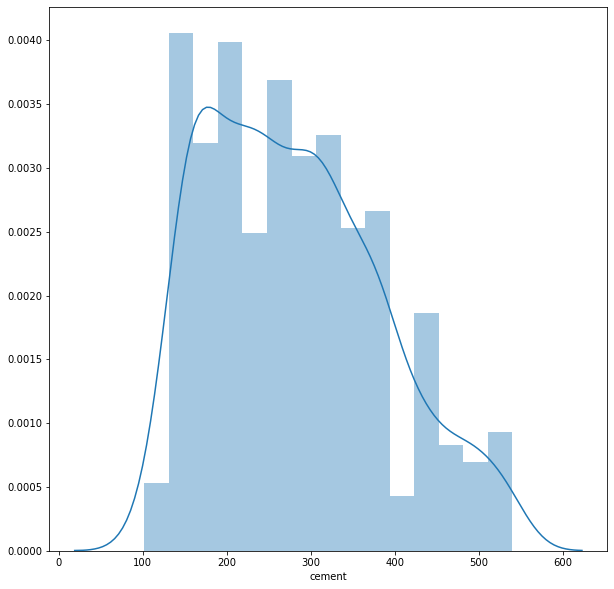

----------------------------------------------------


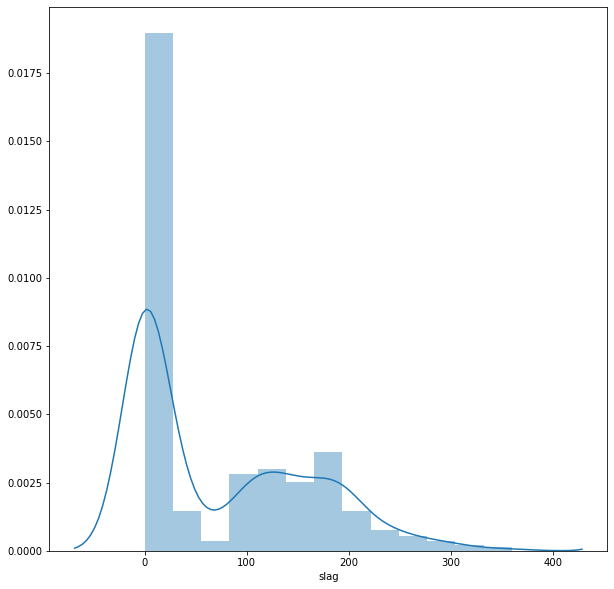

----------------------------------------------------


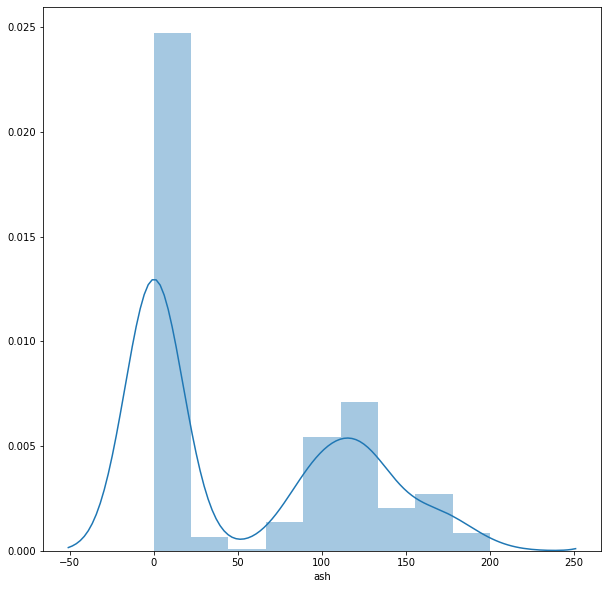

----------------------------------------------------


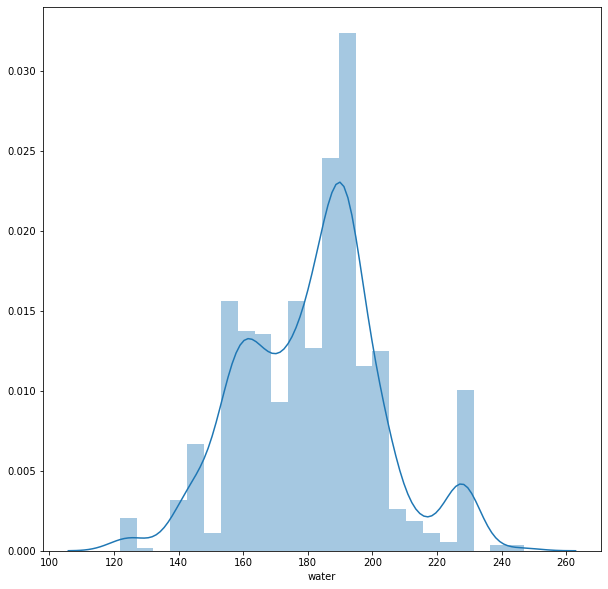

----------------------------------------------------


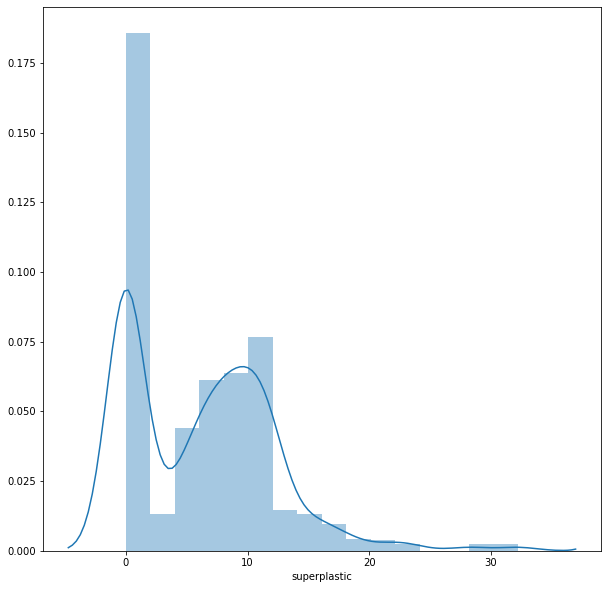

----------------------------------------------------


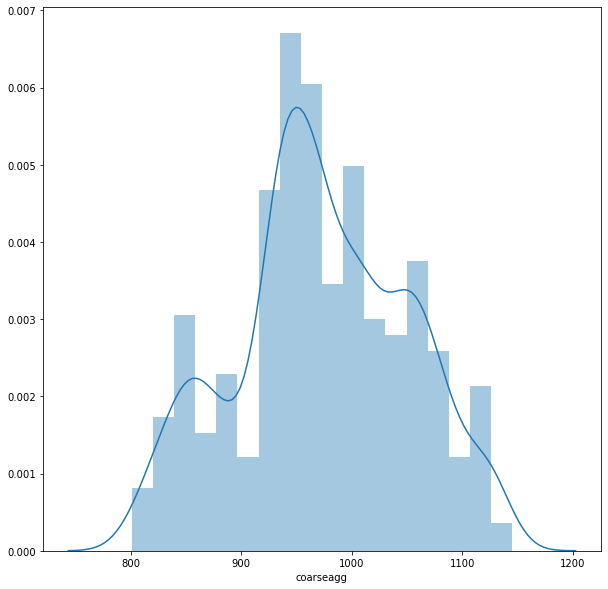

----------------------------------------------------


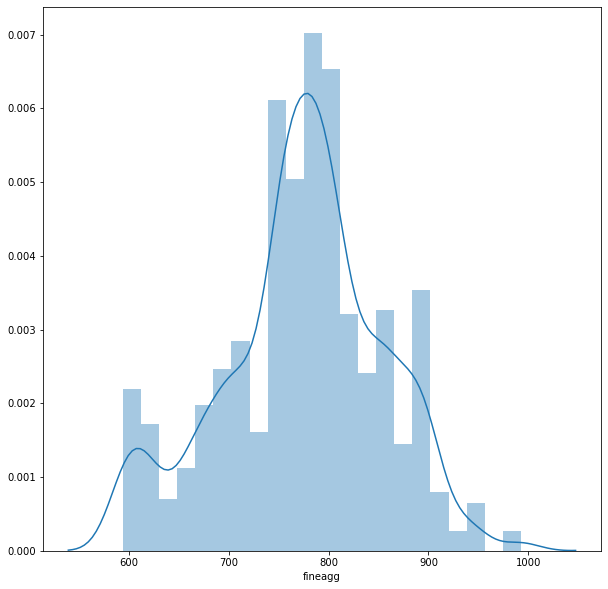

----------------------------------------------------


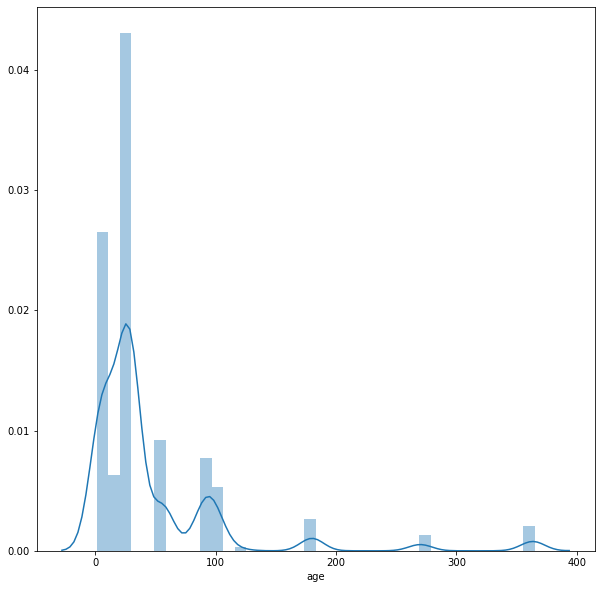

----------------------------------------------------


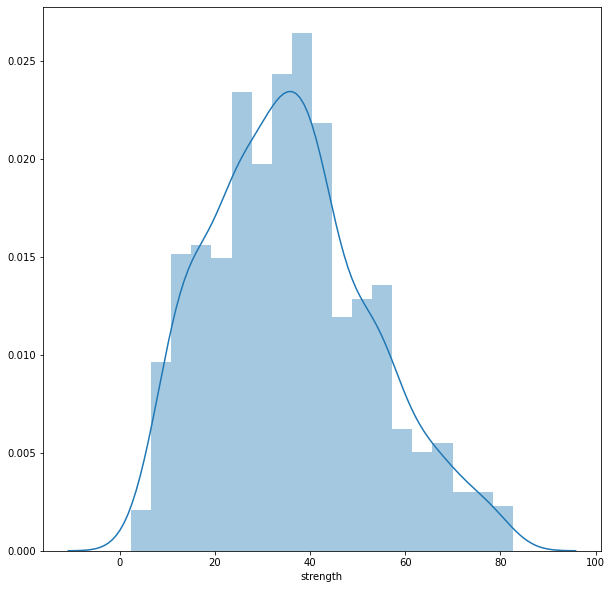

----------------------------------------------------


In [6]:
# The function creates a histogram of all independent variables. 
for feature in Data.columns: # Loop through all columns in the dataframe
    plt.figure(figsize = (10,10))
    sns.distplot(Data[feature])
    plt.show()
    print('----------------------------------------------------')
    

In [7]:
# Find duplicated rows
# In this example it is possible to have a record where all independent and dependent variables match exactly.
duplicateDFRow = Data[Data.duplicated()]
print(duplicateDFRow)
print('-------', len(duplicateDFRow))

     cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
468   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
482   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
493   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
517   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
525   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
527   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
576   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
577   425.0  106.3  0.0  153.5          16.5      8

In [8]:
#In a few of the runs the duplicated records were dropped.
# The step to drop the duplicates was commented out subsequentlt because we need more data in the run.
#Data.drop_duplicates(keep=False,inplace=True) 
#print(len(Data))

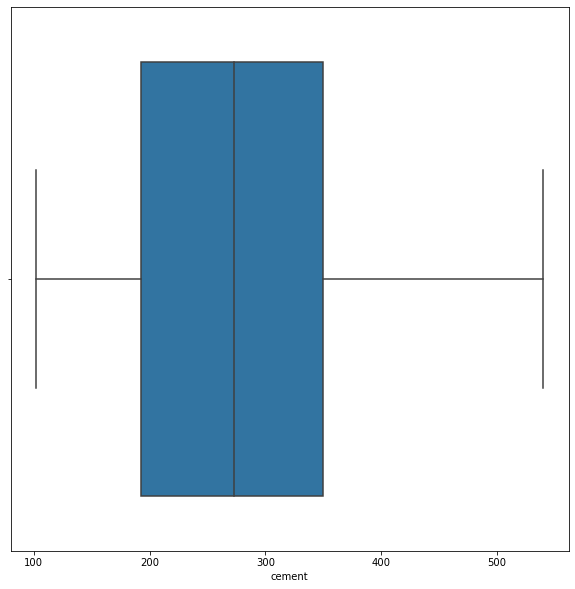

----------------------------------------------------


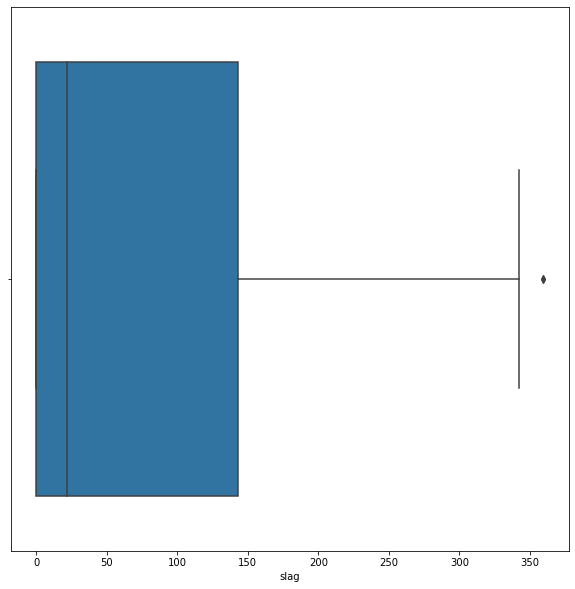

----------------------------------------------------


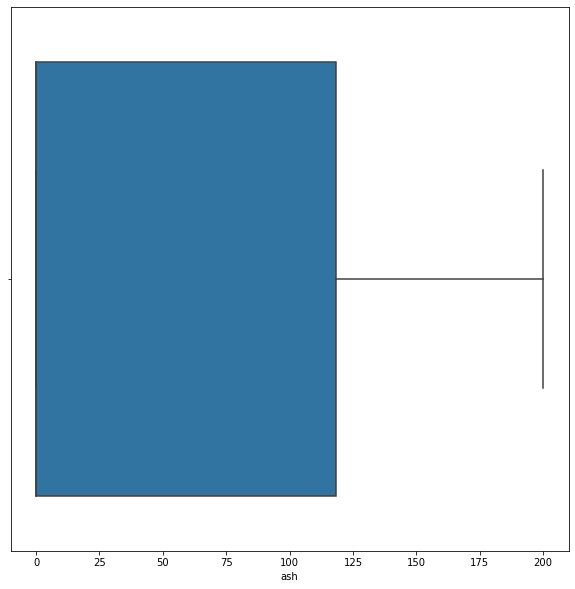

----------------------------------------------------


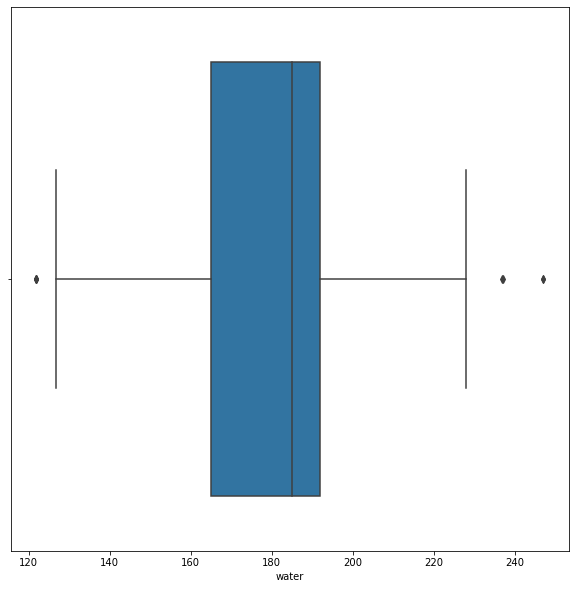

----------------------------------------------------


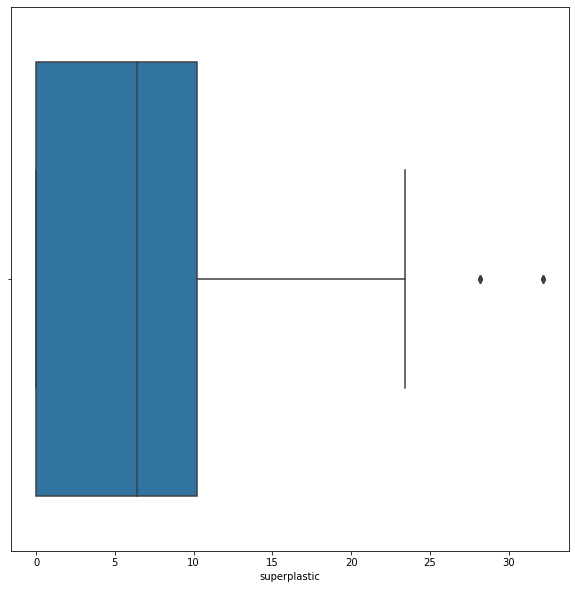

----------------------------------------------------


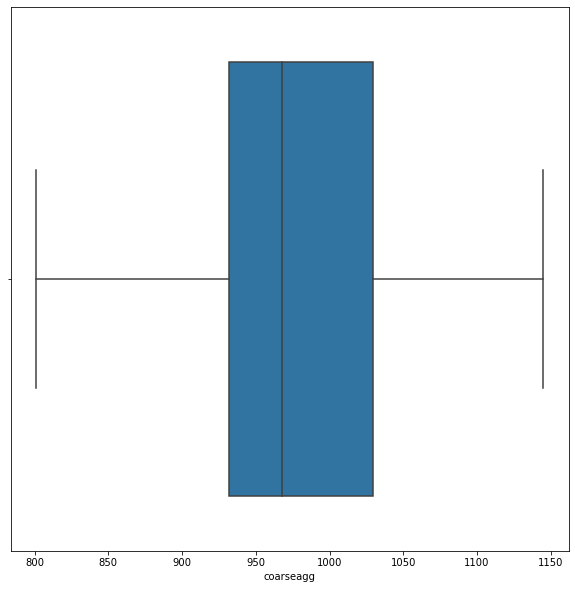

----------------------------------------------------


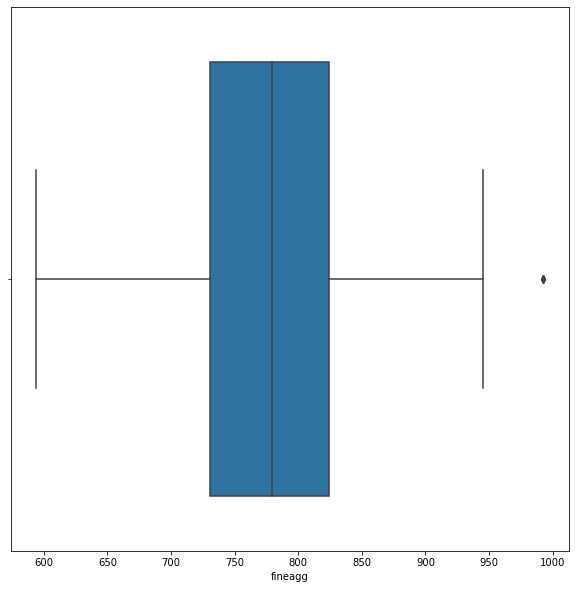

----------------------------------------------------


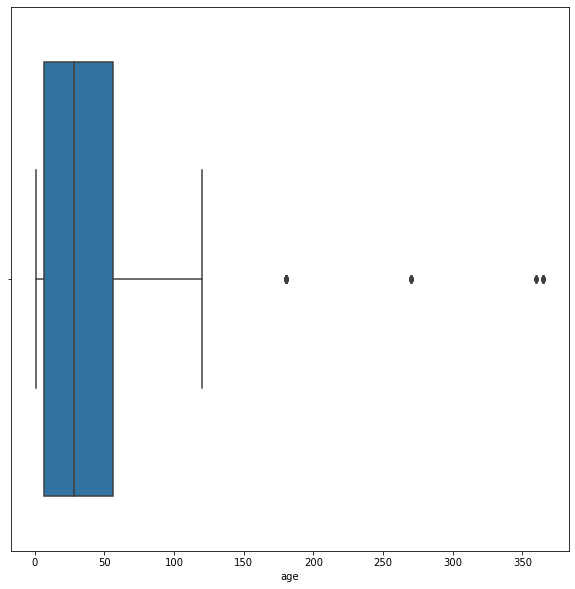

----------------------------------------------------


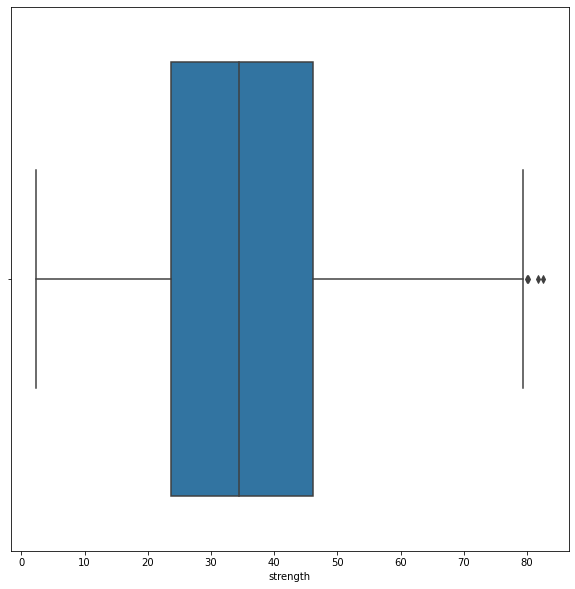

----------------------------------------------------


In [9]:
# We use boxplot to see the outliers in the data set
# The most significant Outliers are in the independent variable 'age'
for feature in Data.columns: # Loop through all columns in the dataframe
   plt.figure(figsize = (10,10))
   sns.boxplot(Data[feature])
   plt.show()
   print('----------------------------------------------------')
   

In [10]:
# There are outliers existant in the data set for age other outliers are within a standard deviation
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
      if is_numeric_dtype(df[name]):
       df = df[(df[name] > quant_df.loc[low, name]) 
               & (df[name] < quant_df.loc[high, name])]
    return df
Data2 = remove_outlier(Data)
Data2.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,109.0,252.241284,98.040399,143.80,167.40,213.80,314.00,446.00
slag,109.0,87.254128,50.381071,11.00,24.00,98.10,129.80,209.00
ash,109.0,102.002752,33.802486,24.50,81.80,106.90,124.30,161.00
water,109.0,176.688073,16.343901,154.00,162.00,175.50,187.60,220.10
superplastic,109.0,8.973394,2.800980,1.70,7.00,9.00,10.90,15.30
coarseagg,109.0,964.230275,63.450384,848.00,923.00,953.30,1007.20,1080.80
fineagg,109.0,755.327523,52.004006,633.00,712.00,761.00,785.50,845.00
age,109.0,35.550459,23.664901,7.00,28.00,28.00,28.00,100.00
strength,109.0,40.491376,12.322104,15.07,30.88,41.67,49.99,66.78


In [11]:
# By removing outliers which are at lower 5% or upper 95% alone, we have a large impact on the data set. 
# I don't think it is a good move to remove the outliers because the data set would reduce to 109 records from 1030 records
# This leads to reduction of useful information. 

In [12]:
# Since several independent variables have minimum value of 0 it would make sense to not consider these as outliers
# The number of outliers in the data set are reduced this way
#
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .00
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
      if is_numeric_dtype(df[name]):
       df = df[(df[name] >= quant_df.loc[low, name]) 
               & (df[name] <= quant_df.loc[high, name])]
    return df
Data2 = remove_outlier(Data)
Data2.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,701.0,268.797004,88.273641,108.30,190.30,272.80,331.00,480.00
slag,701.0,65.861341,76.999388,0.00,0.00,19.00,135.70,236.00
ash,701.0,57.960913,60.493650,0.00,0.00,24.50,118.30,167.00
water,701.0,183.698146,18.974711,121.80,171.60,186.00,193.00,228.00
superplastic,701.0,5.450214,4.713684,0.00,0.00,6.00,9.50,16.00
coarseagg,701.0,974.242083,69.991437,801.00,932.00,968.00,1028.40,1104.00
fineagg,701.0,777.368188,61.640577,594.00,748.50,780.10,815.00,895.30
age,701.0,36.310984,38.161465,1.00,7.00,28.00,28.00,180.00
strength,701.0,32.874494,13.878154,2.33,23.22,32.72,41.94,66.78


### Univariate Analysis
    The skewed nature of 'age' was dealt with in the feature engineering part. The outliers in age were significantly reduced by creating a new variable 'Bcc'. Duplicate records were not removed because these may be legitimate samples that happen to have the same numerical values. 

## 2. Bi-variate Analysis
    Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)

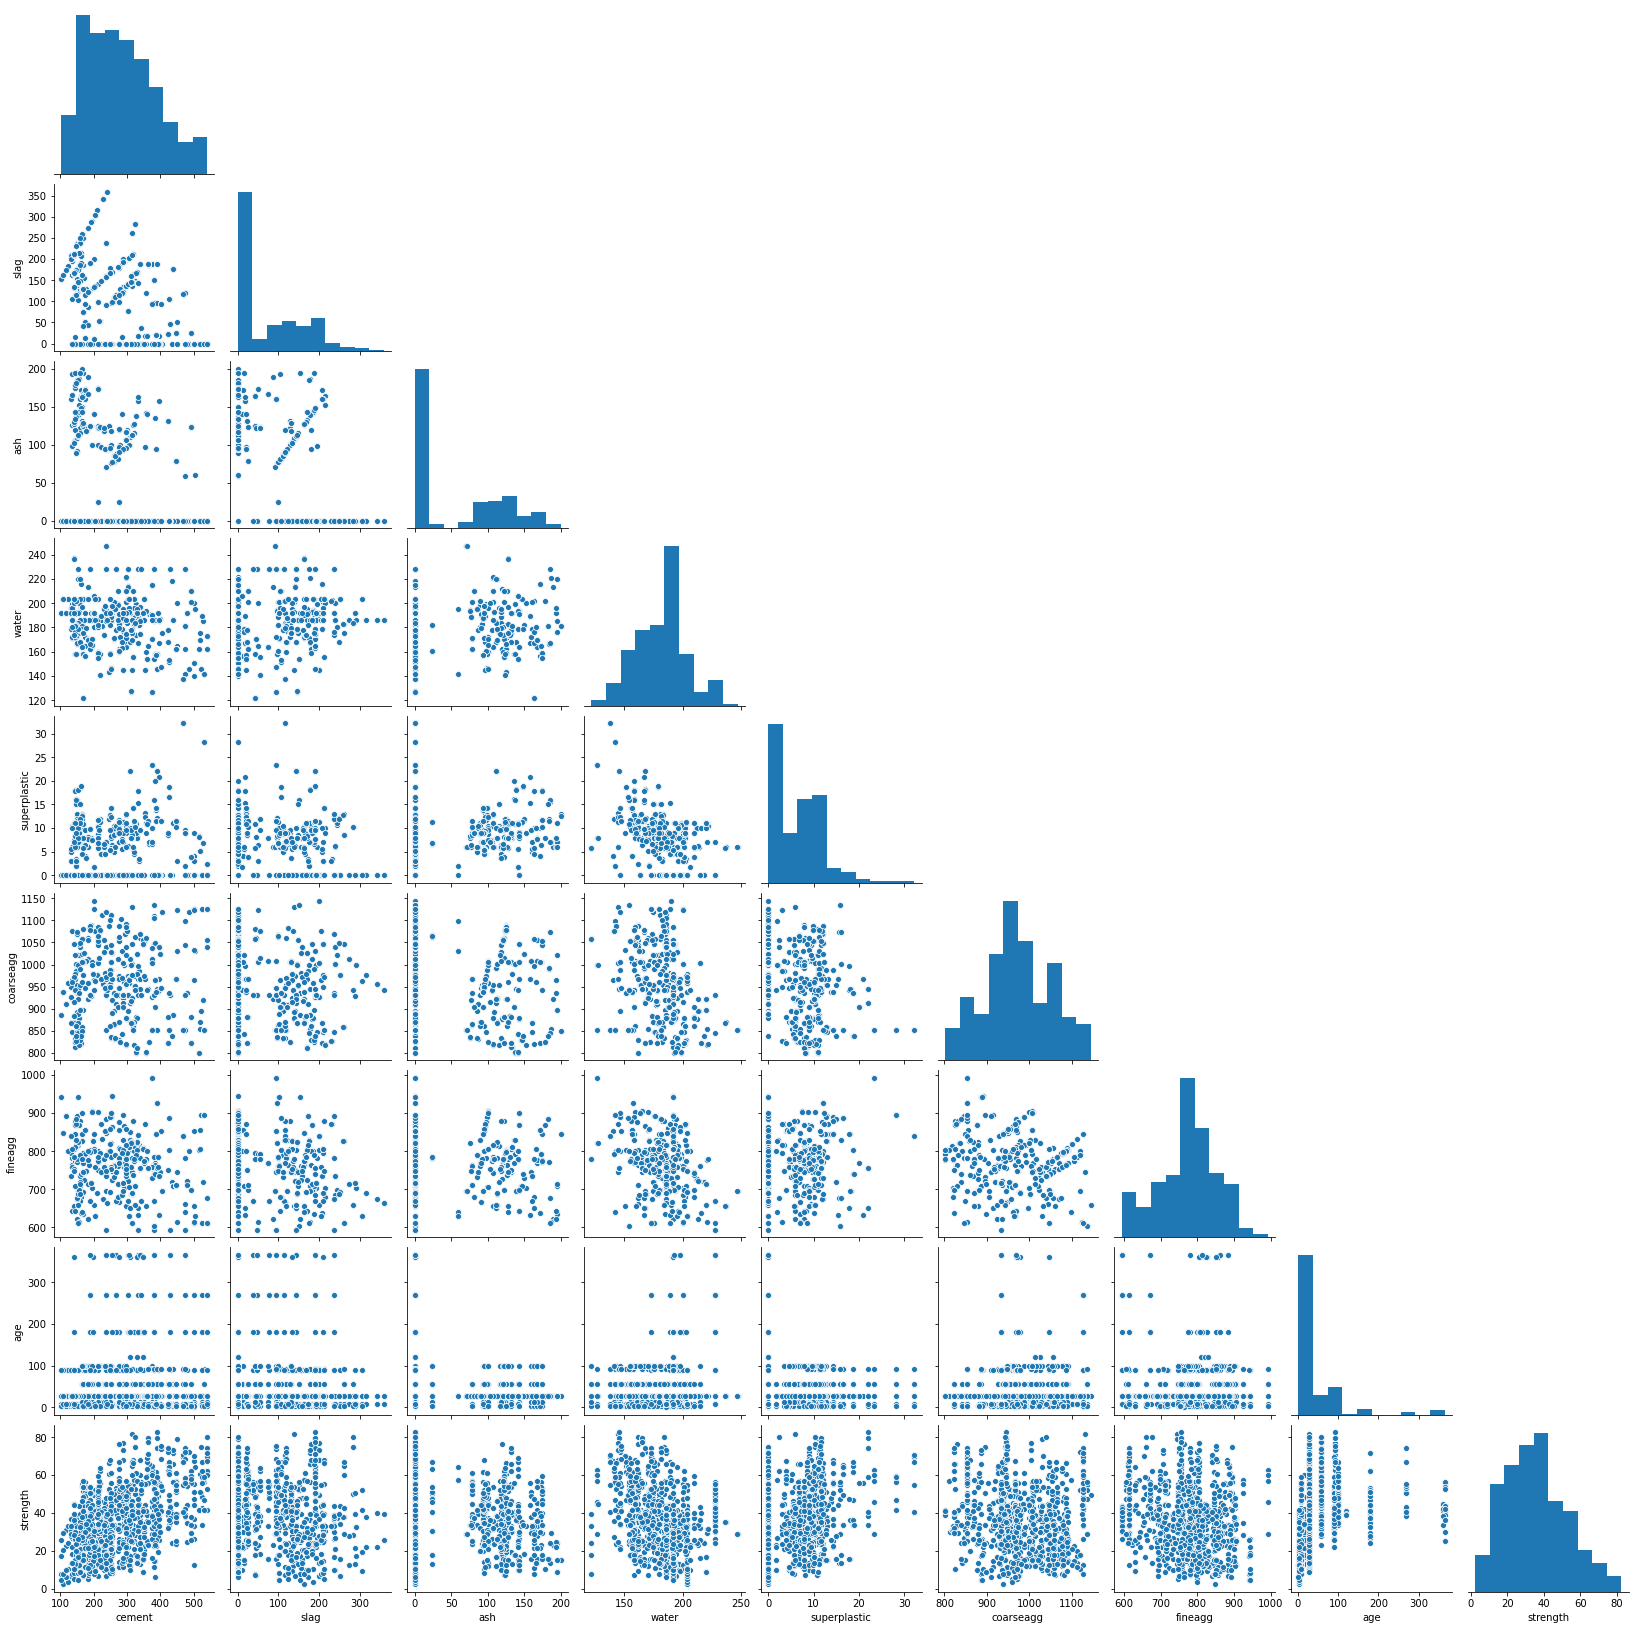

In [13]:
# Start by looking at pair plot
sns.pairplot(Data, corner=True)
plt.show()

In [14]:
Data.corr()
#We look at the correlations between independent variables

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


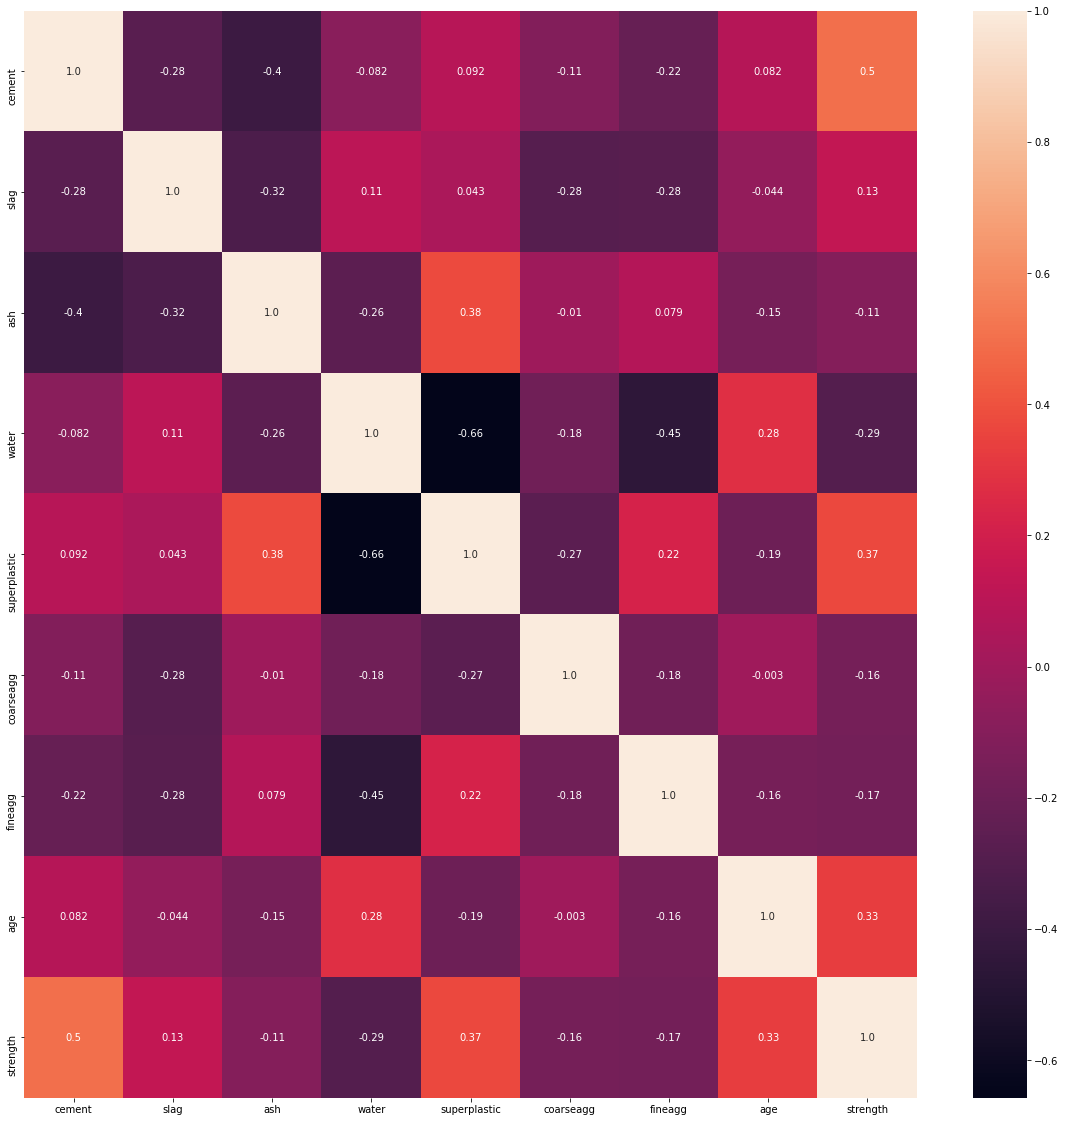

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(), annot=True, fmt=".2")
plt.show()

### Observations from Correlation Data
    There appears to be a strong positive correlation between cement and strength which is the target variable.
    There is a negative correlation between superplastic and water as well as fineagg and water. These are correlations are further studied by creating scatter plots.

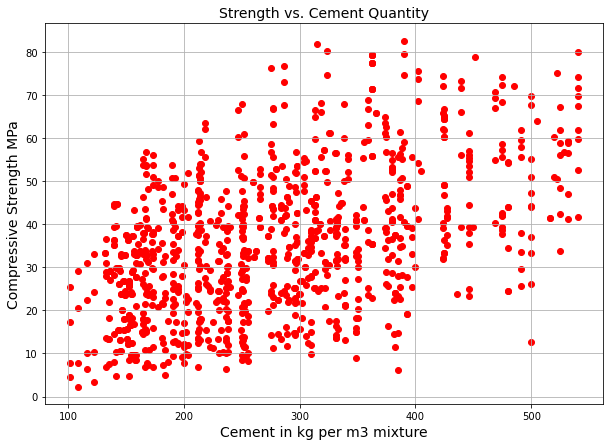

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(Data['cement'], Data['strength'], color='red')
plt.title('Strength vs. Cement Quantity', fontsize=14)
plt.xlabel('Cement in kg per m3 mixture', fontsize=14)
plt.ylabel('Compressive Strength MPa', fontsize=14)
plt.grid(True)
plt.show()
# Shows positive correlation between Cement and Concrete Compressive Strength
# higher the cement in kg per m3, leads to higher concrete strength with correlation coeff = 0.5

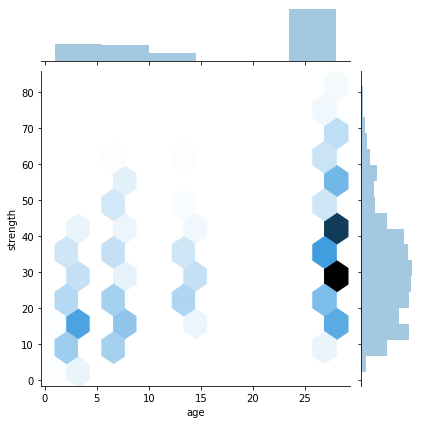

In [17]:
Data3 = Data[Data['age']<=50]
sns.jointplot(Data3['age'], Data3['strength'], kind="hex");
#It is important to look at the relationship between strength and age when the age varies between 0-50 days
# You will see that strength value increases as the concrete is cured from 0 to 28 days. 
# It is customary to utilize the concrete strength achieved after 28 days in computation of compressive design strength of 
# the concrete. It may be worthwhile to look at the strength of concrete only after the age reached 28 days, in one of
# runs of the regression program.

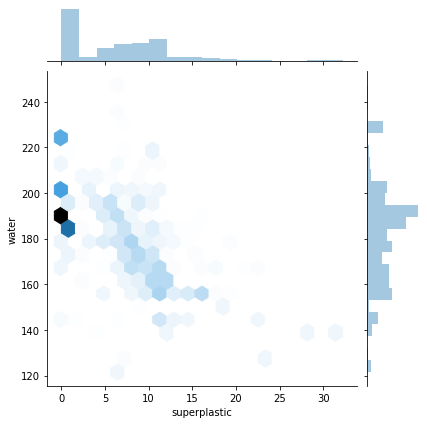

In [18]:
sns.jointplot(Data['superplastic'], Data['water'], kind="hex");
# Another strong correlation is observed between superplasticizer and water
# This correlation is negative as higher superplasticizer is detected water in the mixture is reduced

### Bi-variate Analysis Conclusions
    There is definitely strong correlation between cement and strength and we expect cement to be an important feature. 
    In a few runs I tried dropping the two features, namely superplastic and fineagg that had strong negative correlation 
    with water. However it did not lead to significant improvement because the model has limited number of features to begin
    with. 

## 3.	Feature Engineering techniques
    1.	Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
    2.	Get the data model ready and do a train test split.
    3.	Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.


In [19]:
# Looking at the close correlation between superplastic and water, I considered dropping superplastic
# In the future runs I added the variable back and because I saw a slight improvement in the results.
# Data.drop(['superplastic'], axis=1, inplace = True)

In [20]:
# An important variable in curing of concrete would be the ambient temperature, which is missing in this data set.
# Since I have domain expertize in this area, it would be common for engineers to specify concrete crushing strength 
# expected for each foundation. When concrete is poured ambient temperature at the site is recorded and precaution is taken 
# when very cold temperatures are expected there is adequate heating or insulation applied to prevent sudden cooling. 
# The standard operating procedure in concrete foundations is to create several core samples using the same concrete mixture
# These core samples are tested for compressive strengths after curing is achieved for 28 days. The curing is done at the 
# same ambient conditions where the foundation is located. 

### Development of Compressive Strength with time
Concrete design is usually based on the 28-day strength. In order to calculate mean compressive strength of concrete with time at 20 deg C, fcm(t) = [Bcc(t)]*fcm 
A factor commonly used is Bcc = exp{s[1-(28/t)^0.5]}
where t in days is the age
and s = 0.25 for Class N (Normal early strength)
This additional attribute should be added to the model to test impact of age. 
As the value of t increases much beyond 28 Bcc factor will not increase rapidly.

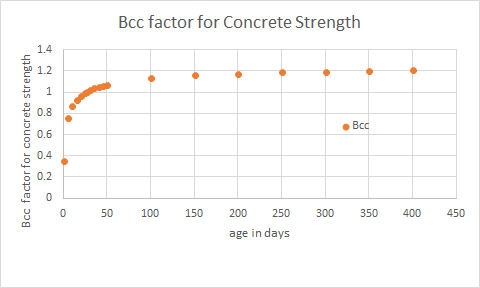

In [21]:
Data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [22]:
import math
#trial
t = Data['age'].tolist()
Bcc= t
i=0
for item in t:
    Bcc[i]=np.exp(0.25*(1-(math.sqrt(28/item))))
    i=i+1
Data['Bcc']= Bcc

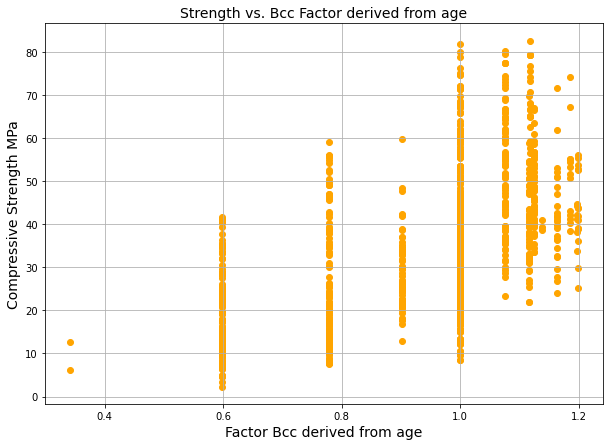

In [27]:
plt.figure(figsize=(10,7))
plt.scatter( Data['Bcc'], Data['strength'],  color='orange')
plt.title('Strength vs. Bcc Factor derived from age', fontsize=14)
plt.xlabel('Factor Bcc derived from age', fontsize=14)
plt.ylabel('Compressive Strength MPa', fontsize=14)
plt.grid(True)
plt.show()

In [28]:
Data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
Bcc             float64
dtype: object

In [29]:
# Copy all the predictor variables into X dataframe. Since 'age' is used to derive Bcc, you can drop age.
Data.drop(['age'], axis=1, inplace = True)
X = Data.drop('strength', axis=1)
# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = Data[['strength']]

In [30]:
col_names = list(Data.columns)
col_names.pop(7)
print(col_names)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'Bcc']


In [31]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)


### Scaling
Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1. 

This helps in reducing the attributes which are numerically larger than others.

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
y_train.size

824

In [34]:
#Define results lists to store model name, RMSE, MSE, MAE, R2
model_name = []
RMSE = []
MSE = []
MAE = []
R2 = []


## 	Creating the Model and Tuning It:
### 1.	Algorithms that you think will be suitable for this project. 
        Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare 
        models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). 


### K-fold Cross Validation Applied to Evaluate the Regression Model

In [35]:
# invoke the LinearRegression function and find the bestfit model on training data
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 8
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
results = cross_val_score(regression_model, X, y, cv=kfold)

In [36]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.75417406 0.85012042 0.79277089 0.82756333 0.80875823 0.81859131
 0.81726262 0.79444728]
Accuracy: 80.796% (2.662%)


In [37]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(col_names):
    print("The coefficient for {} is {}".format( col_names[idx], regression_model.coef_[0][idx]))

The coefficient for cement is 15.56626420867202
The coefficient for slag is 10.609001627411214
The coefficient for ash is 6.441817293759743
The coefficient for water is -1.629668191300271
The coefficient for superplastic is 0.5446159318531973
The coefficient for coarseagg is 3.102820193248963
The coefficient for fineagg is 4.012619351154015
The coefficient for Bcc is 10.418351723684786


In [38]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 35.98020631067961


In [39]:

regression_model.score(X_train, y_train)

0.8172756895868999

In [40]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8126558908535608

In [41]:
y_pred_lr = regression_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
model_name.append('Linear Regression')
RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
MSE.append(mean_squared_error(y_test, y_pred_lr))
MAE.append(mean_absolute_error(y_test, y_pred_lr))
R2.append(r2_score(y_test, y_pred_lr))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 7.43 		 55.17 		5.93 		0.81


### Bagging Method

In [42]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

bgreg = BaggingRegressor(base_estimator=regression_model, n_estimators=10,random_state=0)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgreg = bgreg.fit(X_train, y_train)


In [43]:
results = cross_val_score(regression_model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.75417406 0.85012042 0.79277089 0.82756333 0.80875823 0.81859131
 0.81726262 0.79444728]
Accuracy: 80.796% (2.662%)


In [44]:
y_pred_bgr = bgreg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Bagging \t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_bgr)),mean_squared_error(y_test, y_pred_bgr),
            mean_absolute_error(y_test, y_pred_bgr), r2_score(y_test, y_pred_bgr)))
model_name.append('Bagging')
RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred_bgr)))
MSE.append(mean_squared_error(y_test, y_pred_bgr))
MAE.append(mean_absolute_error(y_test, y_pred_bgr))
R2.append(r2_score(y_test, y_pred_bgr))

Model			 RMSE 		 MSE 		 MAE 		 R2
Bagging 		 7.43 		 55.18 		5.95 		0.81


### Boosting Method

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
Booreg = GradientBoostingRegressor(random_state=0)
Booreg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [46]:
results = cross_val_score(Booreg, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87218004 0.91472702 0.88817085 0.88371806 0.92262944 0.93121591
 0.86428983 0.90571303]
Accuracy: 89.783% (2.278%)


In [47]:
y_pred_booreg = Booreg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Gradient Boosting \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_booreg)),mean_squared_error(y_test, y_pred_booreg),
            mean_absolute_error(y_test, y_pred_booreg), r2_score(y_test, y_pred_booreg)))
model_name.append('Gradient Boosting')
RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred_booreg)))
MSE.append(mean_squared_error(y_test, y_pred_booreg))
MAE.append(mean_absolute_error(y_test, y_pred_booreg))
R2.append(r2_score(y_test, y_pred_booreg))

Model			 RMSE 		 MSE 		 MAE 		 R2
Gradient Boosting 	 5.12 		 26.25 		3.84 		0.91


### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100)
rfreg.fit(X_train, y_train)


RandomForestRegressor()

In [49]:
results = cross_val_score(rfreg, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.86860059 0.92826193 0.92331767 0.89339587 0.93036202 0.93534665
 0.8962788  0.92422707]
Accuracy: 91.247% (2.208%)


In [50]:
y_pred_rfreg = rfreg.predict(X_test)

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor  {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfreg)),mean_squared_error(y_test, y_pred_rfreg),
            mean_absolute_error(y_test, y_pred_rfreg), r2_score(y_test, y_pred_rfreg)))
model_name.append('Random Forest')
RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred_rfreg)))
MSE.append(mean_squared_error(y_test, y_pred_rfreg))
MAE.append(mean_absolute_error(y_test, y_pred_rfreg))
R2.append(r2_score(y_test, y_pred_rfreg))

Model			 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor  4.90 		 24.00 		3.39 		0.92


## Tuning the Model
       2.	Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid 
       Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter 
       tuning and their metrics as above. (15 marks)

In [51]:
## Since we got very good performance from Gradient Boosting and Random Forest Regressor models, we shall use 
## Grid Search on these two models to see if the results could be further improved. 
# An earlier run of Random Search proved that the results were not improved.

In [52]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# specify parameters and distributions to sample from
param_grid = {"max_depth": [3, None],
              "max_features": [1,5,6,8],
              "min_samples_split": [2,3,10],
              "min_samples_leaf": [1,3,10],
              "bootstrap": [True, False],
              "n_estimators": [100, 120, 150]}

In [54]:
# run randomized search
samples = 10  # number of random samples 
Grid_search = GridSearchCV(rfreg, param_grid = param_grid, cv=3, verbose=2, n_jobs=4) 

In [55]:
Grid_search.fit(X_train, y_train)


print(" Best cross-validation accuracy: {:.2f}". format( Grid_search.best_score_)) 
print(" Best parameters: ", Grid_search.best_params_) 
print(" Test set accuracy: {:.2f}". format( Grid_search.score( X_test, y_test)))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   38.9s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:   57.4s
[Parallel(n_jobs=4)]: Done 1296 out of 1296 | elapsed:  1.3min finished


 Best cross-validation accuracy: 0.90
 Best parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Test set accuracy: 0.92


In [56]:
best_results = Grid_search.best_score_
print(best_results)
print("Accuracy: %.3f%% (%.3f%%)" % (best_results.mean()*100.0, best_results.std()*100.0))

0.9037657338780475
Accuracy: 90.377% (0.000%)


In [57]:
y_pred_rfregCV = Grid_search.predict(X_test)

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Grid Search  {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfregCV)),mean_squared_error(y_test, y_pred_rfregCV),
            mean_absolute_error(y_test, y_pred_rfregCV), r2_score(y_test, y_pred_rfregCV)))
model_name.append('Random Forest Grid Search')
RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred_rfregCV)))
MSE.append(mean_squared_error(y_test, y_pred_rfregCV))
MAE.append(mean_absolute_error(y_test, y_pred_rfregCV))
R2.append(r2_score(y_test, y_pred_rfregCV))

Model			 RMSE 		 MSE 		 MAE 		 R2
Random Forest Grid Search  4.82 		 23.26 		3.36 		0.92


### Apply Grid Search to improve the performance of Boosting Algorithm

In [58]:
# specify parameters and distributions to sample from
param_grid2 = {"learning_rate": [0.001, 0.01, 0.1],
              "max_depth": [3,7,9],
              "subsample": [0.5,0.7,1.0],
              "min_samples_leaf": [1,3,10],
              "n_estimators": [100, 120, 150]}

In [59]:
# run randomized search
samples = 10  # number of random samples 
Grid_searchB = GridSearchCV(Booreg, param_grid = param_grid2,  verbose=2) 

In [60]:
Grid_searchB.fit(X_train, y_train)


print(" Best cross-validation accuracy: {:.2f}". format( Grid_searchB.best_score_)) 
print(" Best parameters: ", Grid_searchB.best_params_) 
print(" Test set accuracy: {:.2f}". format( Grid_searchB.score( X_test, y_test)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV] 

[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV] 

[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=

[CV]  learning_rate=0.001, max_depth=3, min_samples_leaf=10, n_estimators=150, subsample=1.0, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]

[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=100, subsample=0.5 
[CV] 

[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV] 

[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=

[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV] 

[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.7 
[CV] 

[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=120, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=120, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=120, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=120, subsample=1.0 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=120, subsample=1.0, total=   0.2s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=

[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_estimators=120, subsample=1.0 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=1.0, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=120, subsample=1.0 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=10, n_estimators=120, subsample=0.7 
[CV] 

[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.7, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.7, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=1, n_estimators=120, subsample=0.7 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=3, n_estimators=120, subsample=0.5 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=100, subsample=1.0, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=100, subsample=1.0, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=120, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=120, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, min_samples_leaf=10, n_estimators=120, subsample=0.5 
[CV] 

[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=0.7, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=1, n_estimators=100, subsample=1.0 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=1.0 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=1.0, total=   0.2s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=3, n_estimators=100, subsample=1.0 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=9, min_samples_leaf=10, n_estimators=100, subsample=1.0 
[CV] 

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=150, subsample=1.0, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, subsample=0.5 
[CV]  learning_r

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=150, subsample=1.0, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=150, subsample=1.0, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=150, subsample=1.0, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=100, subsample=0.5 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=1, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=3, n_estimators=150, subsample=1.0 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, min_samples_leaf=10, n_estimators=150, subsample=1.0 
[CV]  learning_

[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=1, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.7, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=3, n_estimators=150, subsample=0.7 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=120, subsample=1.0, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=9, min_samples_leaf=10, n_estimators=150, subsample=0.5 
[CV]  learning_

[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  2.9min finished


 Best cross-validation accuracy: 0.93
 Best parameters:  {'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 150, 'subsample': 0.7}
 Test set accuracy: 0.94


In [61]:
best_results2 = Grid_searchB.best_score_
print(best_results2)
print("Accuracy: %.3f%% (%.3f%%)" % (best_results2.mean()*100.0, best_results2.std()*100.0))

0.9292618300099529
Accuracy: 92.926% (0.000%)


In [62]:
print(" Best cross-validation accuracy: {:.2f}". format( Grid_searchB.best_score_)) 
print(" Best parameters: ", Grid_searchB.best_params_) 
print(" Test set accuracy: {:.2f}". format( Grid_searchB.score( X_test, y_test)))

 Best cross-validation accuracy: 0.93
 Best parameters:  {'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 150, 'subsample': 0.7}
 Test set accuracy: 0.94


In [63]:
y_pred_rbest = Grid_searchB.predict(X_test)

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Boosting Grid Search  {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rbest)),mean_squared_error(y_test, y_pred_rbest),
            mean_absolute_error(y_test, y_pred_rbest), r2_score(y_test, y_pred_rbest)))
model_name.append('Boosting Tuned Grid Search')
RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred_rbest)))
MSE.append(mean_squared_error(y_test, y_pred_rbest))
MAE.append(mean_absolute_error(y_test, y_pred_rbest))
R2.append(r2_score(y_test, y_pred_rbest))

Model			 RMSE 		 MSE 		 MAE 		 R2
Boosting Grid Search  4.21 		 17.74 		2.80 		0.94


## Final Results

Final results are shown in a data frame named Final_results below.
Linear Regression model and Bagging by itself provided R2 score of 0.8126. This is mostly attributed using Bcc factor defined defined from 'age'.  Even though the exponent function is more complex than a simple linear regression it leads to better R2 score. 

Using Gradient Boosting, the score was improved to 0.91.  Using Random Forest Regressor further improved the R2 score to 0.918.  

### Tuning was performed using Grid Search on two models, Random Forest and Gradient Boosting. In both cases, Tuning improved the performance of the individual models. Random Forest score improved from 0.9185 to 0.921.  Grid Search improved Gradient Boosting R2 Score from 0.9108 to 0.9398(~0.94).

### The best results are observed by Boosting Algorithm Tuned by Grid Search. This model provided 0.94 R2 score and the lowest RMSE of 4.212.

Five of the seven models built provided R2 values that were higher than 85% which was the primary objective of this project. 
The feature importance graph is provided below to provide an idea of which features played important part. Bcc derived from age, was the most important feature in the model and as expected cement was the the second most important feature. 

In [64]:
Final_results = pd.DataFrame()
Final_results['Model'] = model_name
Final_results['RMSE']= RMSE
Final_results['MSE']= MSE
Final_results['MAE']= MAE
Final_results['R2']= R2
Final_results = Final_results.set_index('Model')
Final_results

,RMSE,MSE,MAE,R2
Model,,,,
Linear Regression,7.427454,55.167073,5.928017,0.812656
Bagging,7.428107,55.176767,5.948874,0.812623
Gradient Boosting,5.123812,26.253451,3.837940,0.910845
Random Forest,4.899190,24.002065,3.394162,0.918490
Random Forest Grid Search,4.822990,23.261235,3.360972,0.921006
Boosting Tuned Grid Search,4.211898,17.740085,2.801687,0.939756


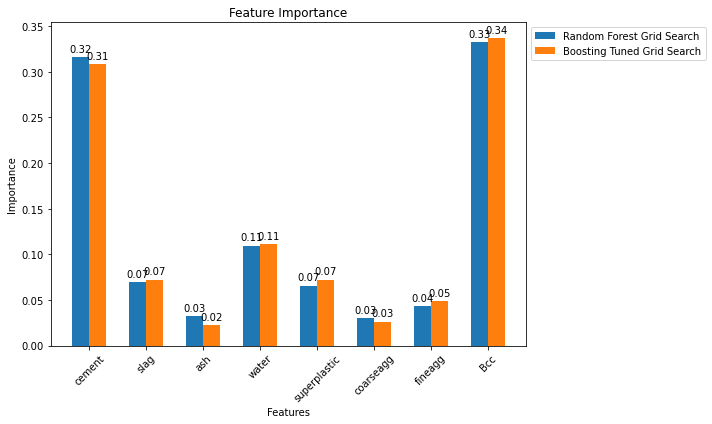

In [65]:
feature_RFGS = Grid_search.best_estimator_.feature_importances_
feature_BTGS = Grid_searchB.best_estimator_.feature_importances_

labels = col_names

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_RFGS, width, label='Random Forest Grid Search')
rects2 = ax.bar(x+(width/2), feature_BTGS, width, label='Boosting Tuned Grid Search')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()